In [1]:
import pandas as pd
import numpy as np
import string
import math
from factor_analyzer.factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### Importing data

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [3]:
data_train.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [4]:
data_test.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
2,276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
3,248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
4,286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


In [5]:
data_train.shape, data_test.shape

((27321, 80), (11709, 80))

In [6]:
data_train.columns, data_test.columns

(Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
        'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
        'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
        'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
        'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
        'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
        'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
        'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
        'family_stdev', 'family_sample_weight', 'family_samples',
        'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
        'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
        'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
        'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
        'second_mortgage_cdf', 'home_equity_cdf',

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          11709 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     11709 non-null  int64  
 3   COUNTYID                     11709 non-null  int64  
 4   STATEID                      11709 non-null  int64  
 5   state                        11709 non-null  object 
 6   state_ab                     11709 non-null  object 
 7   city                         11709 non-null  object 
 8   place                        11709 non-null  object 
 9   type                         11709 non-null  object 
 10  primary                      11709 non-null  object 
 11  zip_code                     11709 non-null  int64  
 12  area_code                    11709 non-null  int64  
 13  lat             

In [9]:
data_train.isnull().sum()

UID                0
BLOCKID        27321
SUMLEVEL           0
COUNTYID           0
STATEID            0
               ...  
pct_own          268
married          191
married_snp      191
separated        191
divorced         191
Length: 80, dtype: int64

In [10]:
data_train.isnull().any().value_counts()

True     59
False    21
dtype: int64

In [11]:
data_test.isnull().sum()

UID                0
BLOCKID        11709
SUMLEVEL           0
COUNTYID           0
STATEID            0
               ...  
pct_own          122
married           84
married_snp       84
separated         84
divorced          84
Length: 80, dtype: int64

In [12]:
data_test.isnull().any().value_counts()

True     59
False    21
dtype: int64

###### Removing the column 'BLOCKID'  and  'SUMLEVEL' because blockid column is empty and sumlevel has the same value for all records

In [13]:
data_train.drop(columns=['BLOCKID', 'SUMLEVEL'], axis = 1, inplace=True)
data_test.drop(columns=['BLOCKID', 'SUMLEVEL'], axis = 1, inplace=True)

In [14]:
data_train.shape, data_test.shape

((27321, 78), (11709, 78))

###### Removing Duplicates

In [15]:
print('No. of duplicates in train dataset :')
print(data_train.duplicated().value_counts(), '\n')
print('No. of duplicates in test dataset :')
print(data_test.duplicated().value_counts())

No. of duplicates in train dataset :
False    27161
True       160
dtype: int64 

No. of duplicates in test dataset :
False    11677
True        32
dtype: int64


In [16]:
data_train.drop_duplicates(keep = 'first', inplace = True)
data_test.drop_duplicates(keep = 'first', inplace = True)

In [17]:
print('No. of duplicates in train dataset :')
print(data_train.duplicated().value_counts(), '\n')
print('No. of duplicates in test dataset :')
print(data_test.duplicated().value_counts())

No. of duplicates in train dataset :
False    27161
dtype: int64 

No. of duplicates in test dataset :
False    11677
dtype: int64


###### Identifying the Primary key

In [18]:
print('Count of Unique values in train set :')
print('=====================================')
print(data_train.nunique())
print('Count of Unique values in test set')
print("==================================")
print(data_test.nunique())

Count of Unique values in train set :
UID            27161
COUNTYID         296
STATEID           52
state             52
state_ab          52
               ...  
pct_own        22302
married        20282
married_snp    10350
separated       6190
divorced       13688
Length: 78, dtype: int64
Count of Unique values in test set
UID            11677
COUNTYID         246
STATEID           52
state             52
state_ab          52
               ...  
pct_own        10578
married        10215
married_snp     6829
separated       4512
divorced        8273
Length: 78, dtype: int64


###### Column UID has a 27161 unique values which is same as number of records. So, UID can be used as Primary key for the dataset.

###### Indexing helps in fast retrievel of records from a dataset. Python dataframe has inbuilt indexes so there is no need for further indexing.

In [19]:
data_train.describe()

,UID,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,AWater,pop,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
count,27161.000000,27161.000000,27161.000000,27161.000000,27161.000000,27161.000000,27161.000000,2.716100e+04,2.716100e+04,27161.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,26954.000000,27011.000000,27011.000000,27011.000000,27011.000000
mean,257328.592209,85.660322,28.267185,50105.133243,596.589816,37.519180,-91.297136,1.300355e+08,6.542839e+06,4324.547218,...,40.354614,40.395275,22.213313,544.289544,2211.217519,0.642269,0.509312,0.047344,0.019073,0.100385
std,21342.667653,98.373195,16.385918,29546.218041,232.424069,5.585968,16.340783,1.277991e+09,2.193149e+08,2131.542105,...,5.822023,7.985358,2.447802,280.681202,1083.432414,0.224184,0.135701,0.037156,0.020744,0.048808
min,220342.000000,1.000000,1.000000,602.000000,201.000000,17.929085,-165.453872,4.113400e+04,0.000000e+00,0.000000,...,16.008330,13.250000,0.556780,0.664700,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238826.000000,29.000000,13.000000,26847.000000,405.000000,33.906105,-97.819063,1.809071e+06,0.000000e+00,2895.000000,...,36.932603,35.000000,21.324497,356.481745,1474.000000,0.505040,0.426550,0.020825,0.004555,0.066015
50%,257212.000000,63.000000,28.000000,47804.000000,614.000000,38.760645,-86.571868,4.888017e+06,2.779500e+04,4049.000000,...,40.389660,40.583330,22.520945,503.969830,2068.000000,0.691585,0.527230,0.038770,0.013460,0.095330
75%,275810.000000,109.000000,42.000000,77093.000000,801.000000,41.393414,-79.802626,3.373467e+07,5.252160e+05,5435.000000,...,43.574030,45.416670,23.579895,680.324678,2774.000000,0.817673,0.606055,0.064895,0.027460,0.129030
max,294334.000000,840.000000,72.000000,99925.000000,989.000000,67.074018,-65.379332,1.040000e+11,2.453228e+10,53812.000000,...,79.837390,82.250000,30.241270,6197.995200,27250.000000,1.000000,1.000000,0.714290,0.714290,1.000000


In [20]:
data_test.describe()

,UID,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,AWater,pop,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
count,11677.000000,11677.000000,11677.000000,11677.000000,11677.000000,11677.000000,11677.000000,1.167700e+04,1.167700e+04,11677.000000,...,11590.000000,11590.000000,11590.000000,11590.000000,11590.000000,11565.000000,11600.000000,11600.000000,11600.000000,11600.000000
mean,257515.084953,85.810054,28.481459,50136.617796,593.626103,37.404823,-91.342375,1.087706e+08,5.165436e+06,4372.098827,...,40.128878,40.152660,22.160832,550.062635,2233.879810,0.634921,0.506016,0.047903,0.019342,0.099274
std,21471.783064,99.395979,16.609621,29762.242840,232.054490,5.626697,16.402506,7.570166e+08,1.524731e+08,2119.148500,...,5.820675,7.952149,2.521395,279.148294,1071.479442,0.231238,0.139175,0.038573,0.021414,0.048441
min,220336.000000,1.000000,1.000000,601.000000,201.000000,17.965835,-166.770979,8.299000e+03,0.000000e+00,0.000000,...,15.360240,12.833330,0.737110,0.251910,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238811.000000,29.000000,13.000000,25701.000000,404.000000,33.916899,-97.805299,1.721296e+06,0.000000e+00,2940.000000,...,36.750570,34.750000,21.277995,363.394600,1501.000000,0.493490,0.422563,0.020890,0.004500,0.064687
50%,257644.000000,61.000000,28.000000,47371.000000,612.000000,38.617819,-86.658629,4.845509e+06,2.281800e+04,4120.000000,...,40.203245,40.333330,22.474795,509.139220,2099.500000,0.687910,0.525505,0.038670,0.013870,0.094435
75%,276277.000000,109.000000,42.000000,77388.000000,787.000000,41.233149,-79.723197,3.211049e+07,4.864500e+05,5475.000000,...,43.499500,45.333330,23.549955,685.694577,2800.000000,0.815350,0.605672,0.065285,0.027910,0.128412
max,294333.000000,810.000000,72.000000,99929.000000,989.000000,64.804269,-65.695344,5.520166e+10,1.212570e+10,39454.000000,...,90.107940,90.166670,29.626680,4145.557870,15466.000000,1.000000,1.000000,0.714290,0.714290,0.362750


###### Fill rate of variables for train and test sets

In [21]:
columns_train = data_train.columns
row_count1 = data_train.shape[0]
fill_rate = pd.DataFrame(columns = ['Columns', 'Fill_%'])
fill_rate['Columns'] = columns_train
fill_pct = []
for col in columns_train:
    counts = data_train[col].count()
    pct = round(((counts/row_count1) * 100), 1)
    fill_pct.append(pct)
    
fill_rate['Fill_%'] = fill_pct

In [22]:
print('Fill rate for train dataset :')
fill_rate

Fill rate for train dataset :


,Columns,Fill_%
0,UID,100.0
1,COUNTYID,100.0
2,STATEID,100.0
3,state,100.0
4,state_ab,100.0
...,...,...
73,pct_own,99.2
74,married,99.4
75,married_snp,99.4
76,separated,99.4


In [23]:
columns_test = data_test.columns
row_count2 = data_test.shape[0]
fill_rate = pd.DataFrame(columns = ['Columns', 'Fill_%'])
fill_rate['Columns'] = columns_test
fill_pct = []
for col in columns_test:
    counts = data_test[col].count()
    pct = round(((counts/row_count2) * 100), 1)
    fill_pct.append(pct)
    
fill_rate['Fill_%'] = fill_pct

In [24]:
print('Fill rate for test dataset :')
fill_rate

Fill rate for test dataset :


,Columns,Fill_%
0,UID,100.0
1,COUNTYID,100.0
2,STATEID,100.0
3,state,100.0
4,state_ab,100.0
...,...,...
73,pct_own,99.0
74,married,99.3
75,married_snp,99.3
76,separated,99.3


###### In columns, pop, there are some records for which the value is 0. I am removing all records with population zero as these places are not revelant for our analysis.

In [25]:
print('No.of missing value in pop in train dataset = ', (data_train['pop']==0).sum())
print('No.of missing value in pop in test  dataset = ', (data_test['pop']==0).sum())

No.of missing value in pop in train dataset =  142
No.of missing value in pop in test  dataset =  74


###### There are 142 records with population as zero. So, remove them.

In [26]:
data_train = data_train.drop(data_train[data_train['pop']==0].index).reset_index(drop=True)
data_test = data_test.drop(data_test[data_test['pop']==0].index).reset_index(drop=True)

In [27]:
print('No.of missing value in pop in train dataset = ', (data_train['pop']==0).sum())
print('No.of missing value in pop in test  dataset = ', (data_test['pop']==0).sum())

No.of missing value in pop in train dataset =  0
No.of missing value in pop in test  dataset =  0


###### Finding the remaining missing values in the data sets

In [28]:
print('Remaining missing values for train dataset :')
print(data_train.isnull().any().value_counts(), '\n')
print('Remaining missing values for test dataset :')
print(data_test.isnull().any().value_counts())

Remaining missing values for train dataset :
True     58
False    20
dtype: int64 

Remaining missing values for test dataset :
True     58
False    20
dtype: int64


###### So there are 58 columns in train and test datasets with missing values

###### Imputing missing values with median value of corresponding columns because median is independent of outliers.

In [29]:
records = len(data_train)
columns = data_train.columns
for i in columns:
    counts = data_train[i].count()
    if counts < records:
        data_train[i].fillna(data_train[i].median(), inplace=True)

In [30]:
records = len(data_test)
columns = data_test.columns
for i in columns:
    counts = data_test[i].count()
    if counts < records:
        data_test[i].fillna(data_test[i].median(), inplace=True)

In [31]:
print('Is there any more missing values for train dataset :')
print(data_train.isnull().any().value_counts(), '\n')
print('Is there any more missing values for test dataset :')
print(data_test.isnull().any().value_counts())

Is there any more missing values for train dataset :
False    78
dtype: int64 

Is there any more missing values for test dataset :
False    78
dtype: int64


###### Missing value treatment complete. Saving the data to csv file for tableau dashboard

In [32]:
data_train.to_csv('RealEstate.csv')

### Exploratory Data Analysis

###### Finding the location of all the household where second mortgage is greater and pct_own is > 0.1

In [33]:
subset1 = []
subset1 = data_train.loc[:, ['UID', 'STATEID', 'state', 'city', 'place', 'lat', 'lng', 'home_equity_second_mortgage', 
                             'second_mortgage', 'home_equity', 'debt', 'pct_own']]

In [34]:
subset1['bad_debt'] = subset1['second_mortgage'] + subset1['home_equity'] - subset1['home_equity_second_mortgage']
subset1

,UID,STATEID,state,city,place,lat,lng,home_equity_second_mortgage,second_mortgage,home_equity,debt,pct_own,bad_debt
0,267822,36,New York,Hamilton,Hamilton,42.840812,-75.501524,0.01588,0.02077,0.08919,0.52963,0.79046,0.09408
1,246444,18,Indiana,South Bend,Roseland,41.701441,-86.266614,0.02222,0.02222,0.04274,0.60855,0.52483,0.04274
2,245683,18,Indiana,Danville,Danville,39.792202,-86.515246,0.00000,0.00000,0.09512,0.73484,0.85331,0.09512
3,279653,72,Puerto Rico,San Juan,Guaynabo,18.396103,-66.104169,0.01086,0.01086,0.01086,0.52714,0.65037,0.01086
4,247218,20,Kansas,Manhattan,Manhattan City,39.195573,-96.569366,0.05426,0.05426,0.05426,0.51938,0.13046,0.05426
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27014,279212,72,Puerto Rico,Coamo,Coamo,18.076060,-66.358379,0.00000,0.00000,0.00000,0.11694,0.60422,0.00000
27015,277856,42,Pennsylvania,Blue Bell,Blue Bell,40.158138,-75.307271,0.00845,0.02112,0.19641,0.65364,0.68072,0.20908
27016,233000,8,Colorado,Weldona,Saddle Ridge,40.410316,-103.814003,0.02024,0.02024,0.07857,0.58095,0.78508,0.07857
27017,287425,48,Texas,Colleyville,Colleyville City,32.904866,-97.162151,0.05801,0.07550,0.12556,0.65722,0.93970,0.14305


In [35]:
subset2 = subset1.loc[(subset1['second_mortgage'] > 0.2) & (subset1['pct_own'] > 0.1)]
subset2

,UID,STATEID,state,city,place,lat,lng,home_equity_second_mortgage,second_mortgage,home_equity,debt,pct_own,bad_debt
593,233586,9,Connecticut,Hartford,Hartford City,41.767728,-72.706646,0.22997,0.22997,0.48780,0.94774,0.14086,0.48780
1144,232027,8,Colorado,Westminster,Shaw Heights,39.859951,-105.038811,0.17532,0.20022,0.30303,0.76732,0.41785,0.32793
1689,242304,17,Illinois,Chicago,Lincolnwood,41.967289,-87.652434,0.28899,0.28899,0.40826,0.83945,0.14228,0.40826
1743,274903,41,Oregon,Happy Valley,Milwaukie City,45.445405,-122.574608,0.22464,0.22464,0.26570,0.53140,0.23231,0.26570
2060,235788,12,Florida,Tampa,Egypt Lake-leto,28.029063,-82.495395,0.28972,0.28972,0.38785,0.78972,0.11618,0.38785
3258,289712,51,Virginia,Farmville,Farmville,37.297357,-78.396452,0.00000,0.50000,0.00000,0.50000,0.62069,0.50000
4969,282496,47,Tennessee,Memphis,Memphis City,35.128588,-90.039448,0.21875,0.21875,0.21875,1.00000,0.20240,0.21875
5150,291697,53,Washington,Tacoma,Tacoma City,47.240148,-122.437743,0.21429,0.21429,0.21429,0.78571,0.10670,0.21429
6422,292972,55,Wisconsin,Milwaukee,Milwaukee City,43.067063,-87.953378,0.21277,0.26596,0.30851,0.86170,0.26531,0.36170
7223,252309,24,Maryland,Hyattsville,Chillum,38.971338,-76.985846,0.08614,0.21348,0.29213,0.91760,0.27656,0.41947


In [36]:
subset2.to_csv('Locations.csv')

###### Overall debt and bad debt analysis

In [37]:
overall = []
debt = subset1.debt.sum().round(2)
overall.append(debt)
bad_debt = subset1.bad_debt.sum().round(2)
overall.append(bad_debt)

In [38]:
print('Total Debt = ', overall[0])
print('Total Bad Debt = ', overall[1])

Total Debt =  17015.82
Total Bad Debt =  2839.89


([<matplotlib.patches.Wedge at 0x248f9d25130>,
 [Text(-0.990811814043489, 0.4777990677595038, 'Debt'),
  Text(0.9908117245739169, -0.4777992532924899, 'Bad_Debt')],
 [Text(-0.5404428076600848, 0.26061767332336566, '85.70%'),
  Text(0.5404427588585, -0.26061777452317625, '14.30%')])

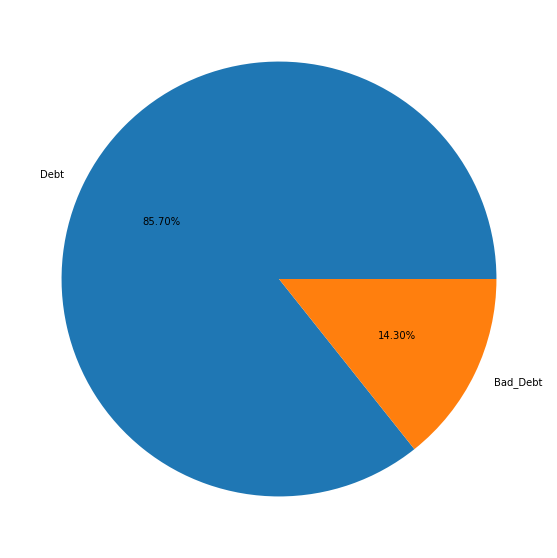

In [39]:
fig = plt.figure(figsize=(20, 10))
plt.pie(overall, labels=['Debt', 'Bad_Debt'], autopct='%1.2f%%')

###### Box plot for second mortgage, home equity, good debt and bad debt for different cities

In [40]:
cities = subset1.city.unique()[0:15]
df = subset1.loc[data_train['city'].isin(cities)]

Text(0, 0.5, 'Second Mortgage')

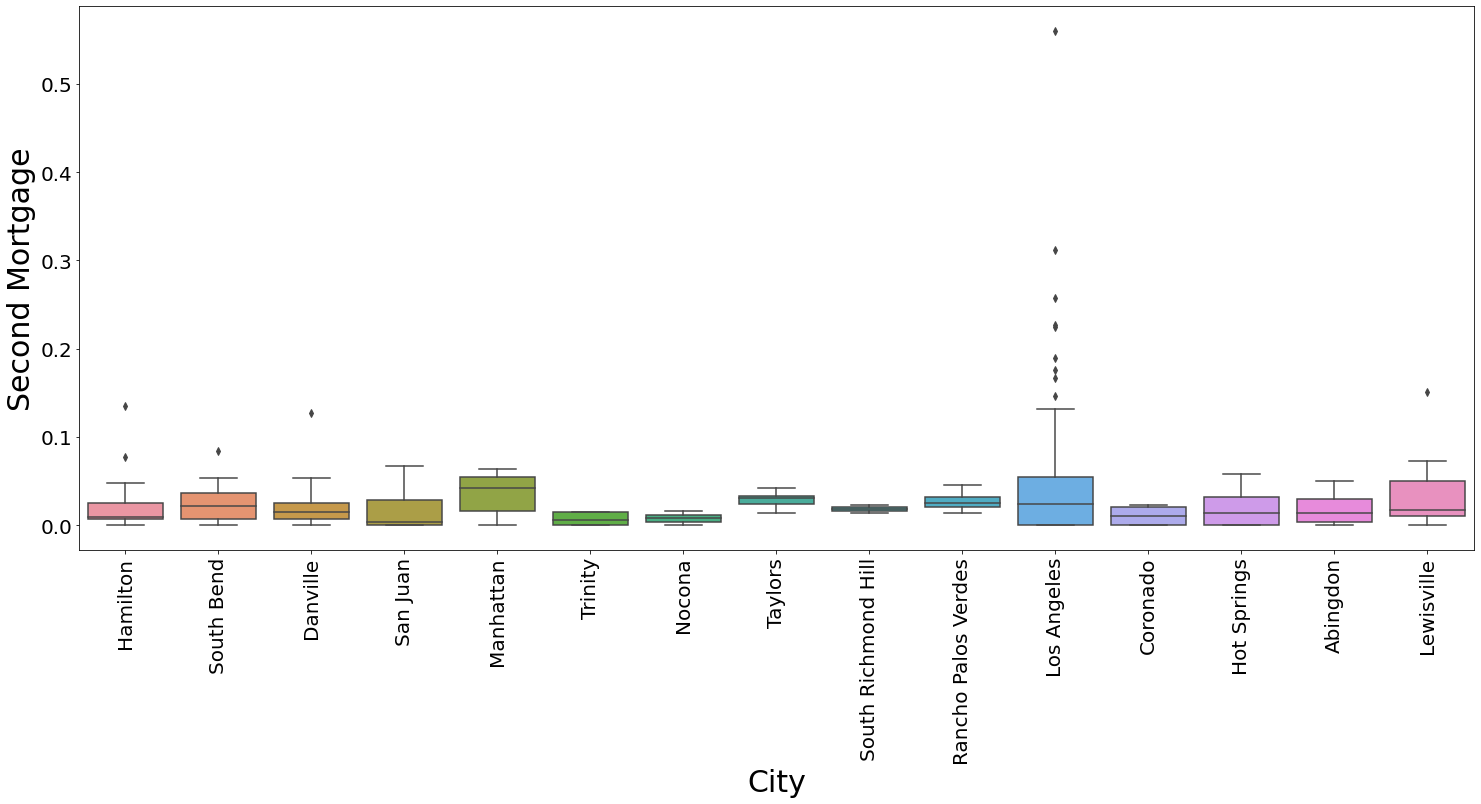

In [41]:
plt.figure(figsize = (25, 10))
sns.boxplot(x=df['city'], y=df['second_mortgage'])
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('City', fontsize=30)
plt.ylabel('Second Mortgage', fontsize=30)

Text(0, 0.5, 'home_equity')

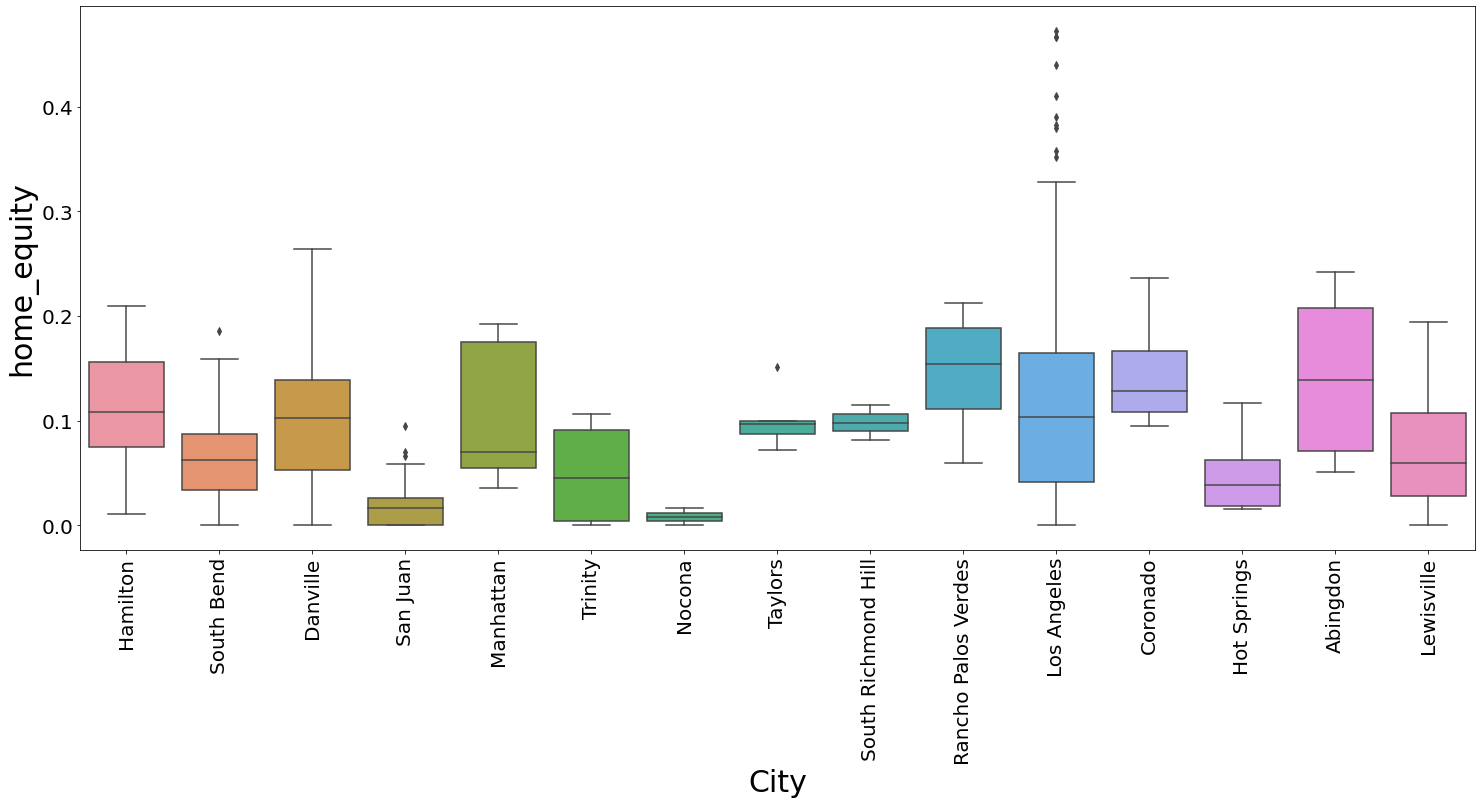

In [42]:
plt.figure(figsize = (25, 10))
sns.boxplot(x=df['city'], y=df['home_equity'])
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('City', fontsize=30)
plt.ylabel('home_equity', fontsize=30)

Text(0, 0.5, 'Good Debt')

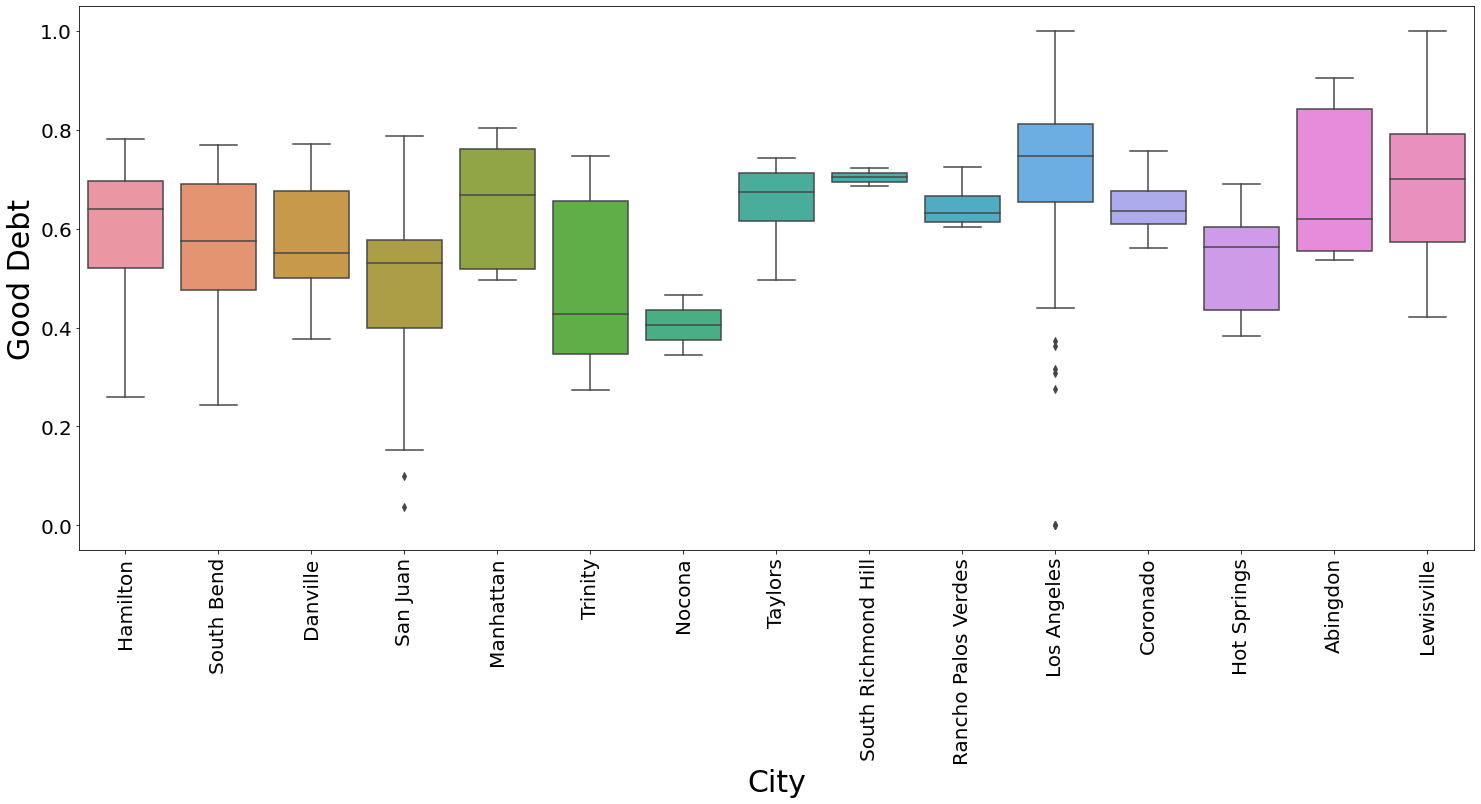

In [43]:
plt.figure(figsize = (25, 10))
sns.boxplot(x=df['city'], y=df['debt'])
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('City', fontsize=30)
plt.ylabel('Good Debt', fontsize=30)

Text(0, 0.5, 'Bad_Debt')

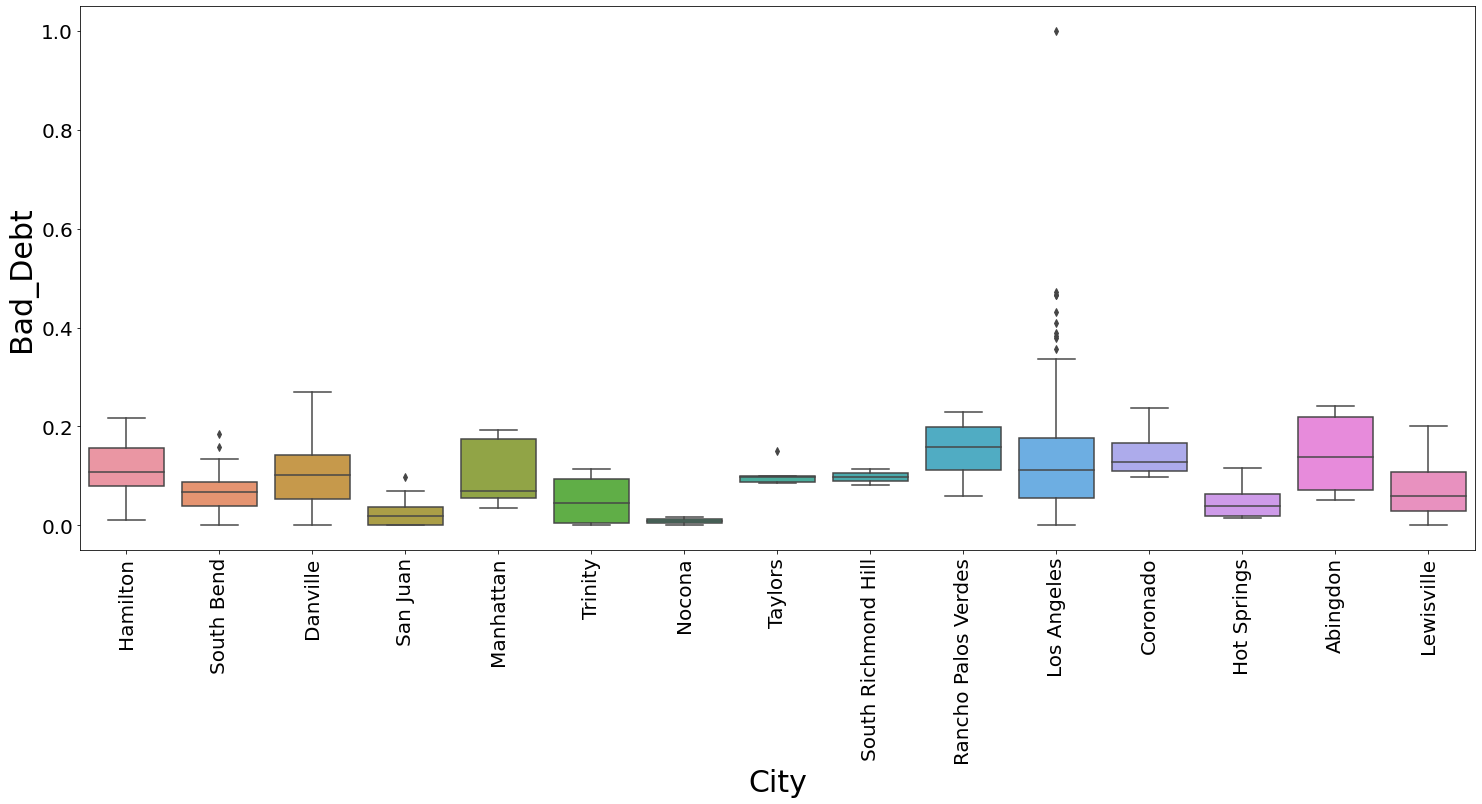

In [44]:
plt.figure(figsize = (25, 10))
sns.boxplot(x=df['city'], y=df['bad_debt'])
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('City', fontsize=30)
plt.ylabel('Bad_Debt', fontsize=30)

###### Collated income distribution chart for family income, household income, and remaining income

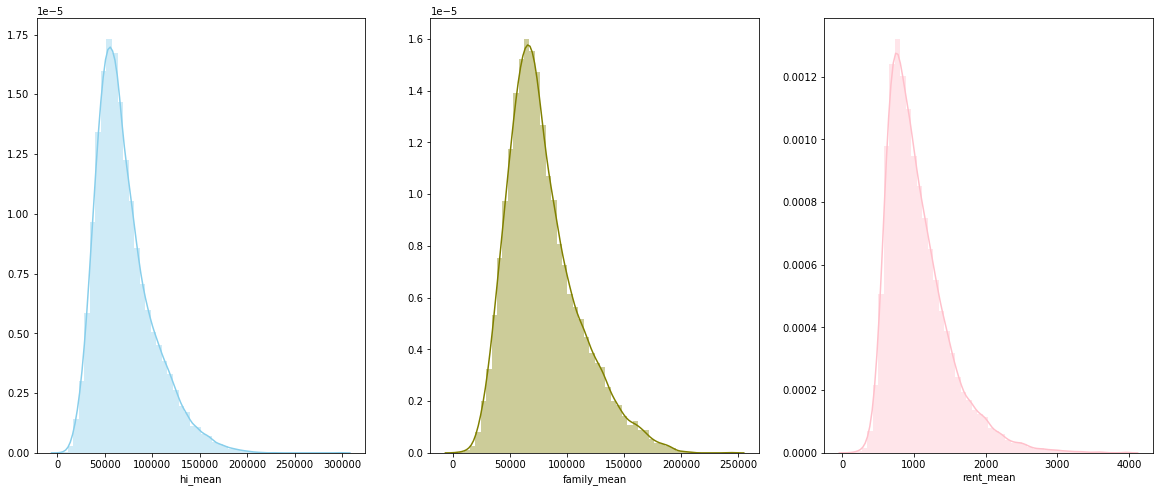

In [45]:
f, axs = plt.subplots(1, 3, figsize = (20, 8))
sns.distplot(data_train['hi_mean'], color='skyblue', ax=axs[0])
sns.distplot(data_train['family_mean'], color='olive', ax=axs[1])
sns.distplot(data_train['rent_mean'], color='pink', ax=axs[2])

###### Creating field 'pop_density' and 'median_age'

In [46]:
subset3 = data_train.loc[:, ['UID', 'STATEID', 'state', 'ALand', 'pop', 'male_pop', 'female_pop', 
                             'male_age_median', 'female_age_median']]

In [47]:
subset3['pop_density'] = subset3['pop'] / subset3['ALand']
subset3

,UID,STATEID,state,ALand,pop,male_pop,female_pop,male_age_median,female_age_median,pop_density
0,267822,36,New York,2.021834e+08,5230,2612,2618,44.00000,45.33333,0.000026
1,246444,18,Indiana,1.560828e+06,2633,1349,1284,32.00000,37.58333,0.001687
2,245683,18,Indiana,6.956160e+07,6881,3643,3238,40.83333,42.83333,0.000099
3,279653,72,Puerto Rico,1.105793e+06,2700,1141,1559,48.91667,50.58333,0.002442
4,247218,20,Kansas,2.554403e+06,5637,2586,3051,22.41667,21.58333,0.002207
...,...,...,...,...,...,...,...,...,...,...
27014,279212,72,Puerto Rico,6.970300e+05,1847,909,938,41.66667,40.16667,0.002650
27015,277856,42,Pennsylvania,5.077337e+06,4155,2116,2039,38.83333,39.50000,0.000818
27016,233000,8,Colorado,1.323262e+09,2829,1465,1364,42.00000,46.33333,0.000002
27017,287425,48,Texas,1.865230e+07,11542,5727,5815,46.66667,43.41667,0.000619


In [48]:
subset3['median_age'] = (subset3['male_age_median'] + subset3['female_age_median']) / 2
subset3

,UID,STATEID,state,ALand,pop,male_pop,female_pop,male_age_median,female_age_median,pop_density,median_age
0,267822,36,New York,2.021834e+08,5230,2612,2618,44.00000,45.33333,0.000026,44.666665
1,246444,18,Indiana,1.560828e+06,2633,1349,1284,32.00000,37.58333,0.001687,34.791665
2,245683,18,Indiana,6.956160e+07,6881,3643,3238,40.83333,42.83333,0.000099,41.833330
3,279653,72,Puerto Rico,1.105793e+06,2700,1141,1559,48.91667,50.58333,0.002442,49.750000
4,247218,20,Kansas,2.554403e+06,5637,2586,3051,22.41667,21.58333,0.002207,22.000000
...,...,...,...,...,...,...,...,...,...,...,...
27014,279212,72,Puerto Rico,6.970300e+05,1847,909,938,41.66667,40.16667,0.002650,40.916670
27015,277856,42,Pennsylvania,5.077337e+06,4155,2116,2039,38.83333,39.50000,0.000818,39.166665
27016,233000,8,Colorado,1.323262e+09,2829,1465,1364,42.00000,46.33333,0.000002,44.166665
27017,287425,48,Texas,1.865230e+07,11542,5727,5815,46.66667,43.41667,0.000619,45.041670


###### Bar plot of population density and median age

In [49]:
df = subset3.groupby('state')['pop_density'].mean().reset_index()
df = df.sort_values(by='pop_density', ascending=False).reset_index(drop=True)
df

,state,pop_density
0,New York,0.009490
1,District of Columbia,0.006438
2,California,0.003348
3,Hawaii,0.003333
4,New Jersey,0.003227
5,Massachusetts,0.002874
6,Illinois,0.002808
7,Puerto Rico,0.002180
8,Pennsylvania,0.002067
9,Rhode Island,0.001969


Text(0, 0.5, 'Populaion Density')

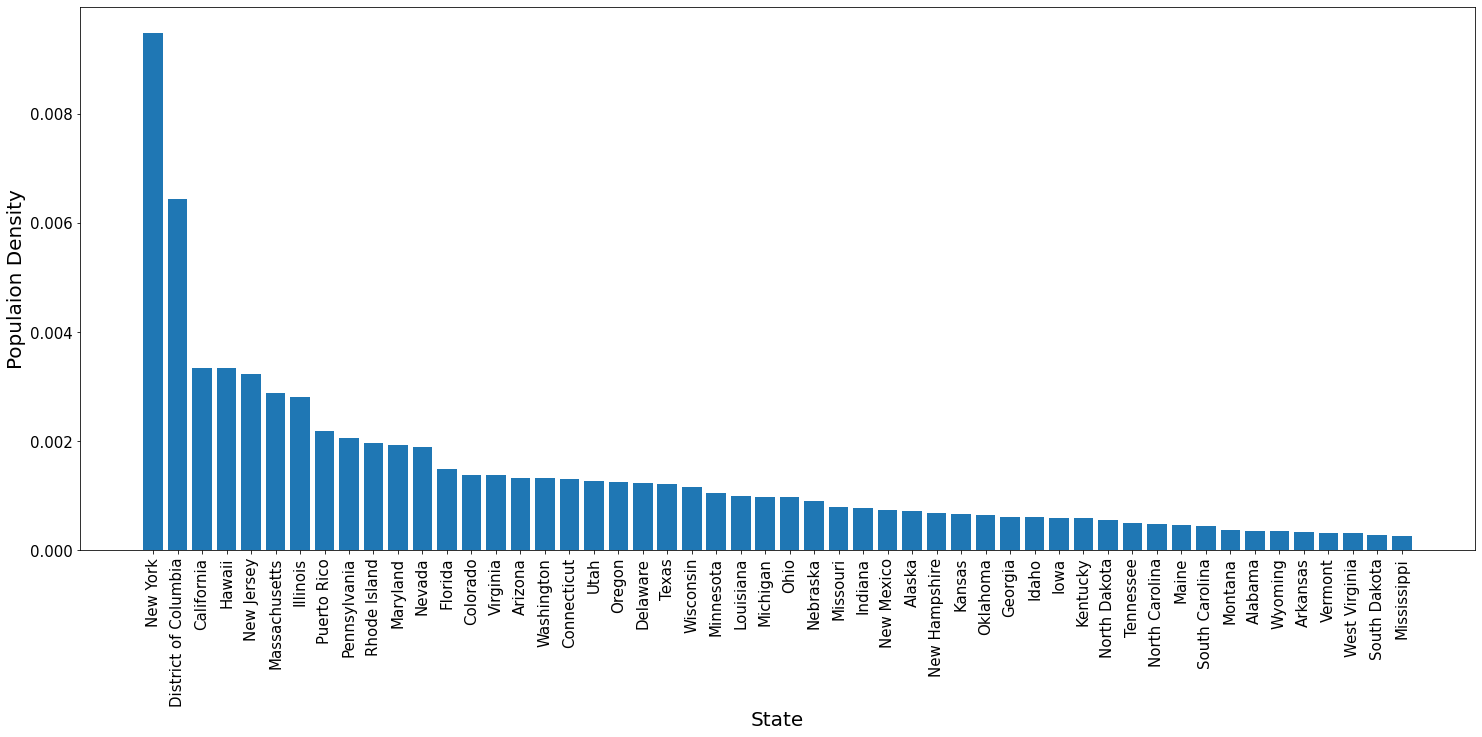

In [50]:
plt.figure(figsize = (25, 10))
plt.bar('state', 'pop_density', data=df)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('State', fontsize=20)
plt.ylabel('Populaion Density', fontsize=20)

In [51]:
df = subset3.groupby('state')['median_age'].mean().reset_index()
df = df.sort_values(by='median_age', ascending=False).reset_index(drop=True)
df

,state,median_age
0,Maine,44.266025
1,Vermont,44.118951
2,Florida,43.643726
3,West Virginia,43.267113
4,New Hampshire,42.140766
5,Montana,42.137255
6,Connecticut,41.180641
7,Oregon,41.026220
8,Delaware,40.988263
9,Pennsylvania,40.881036


Text(0, 0.5, 'Median Age')

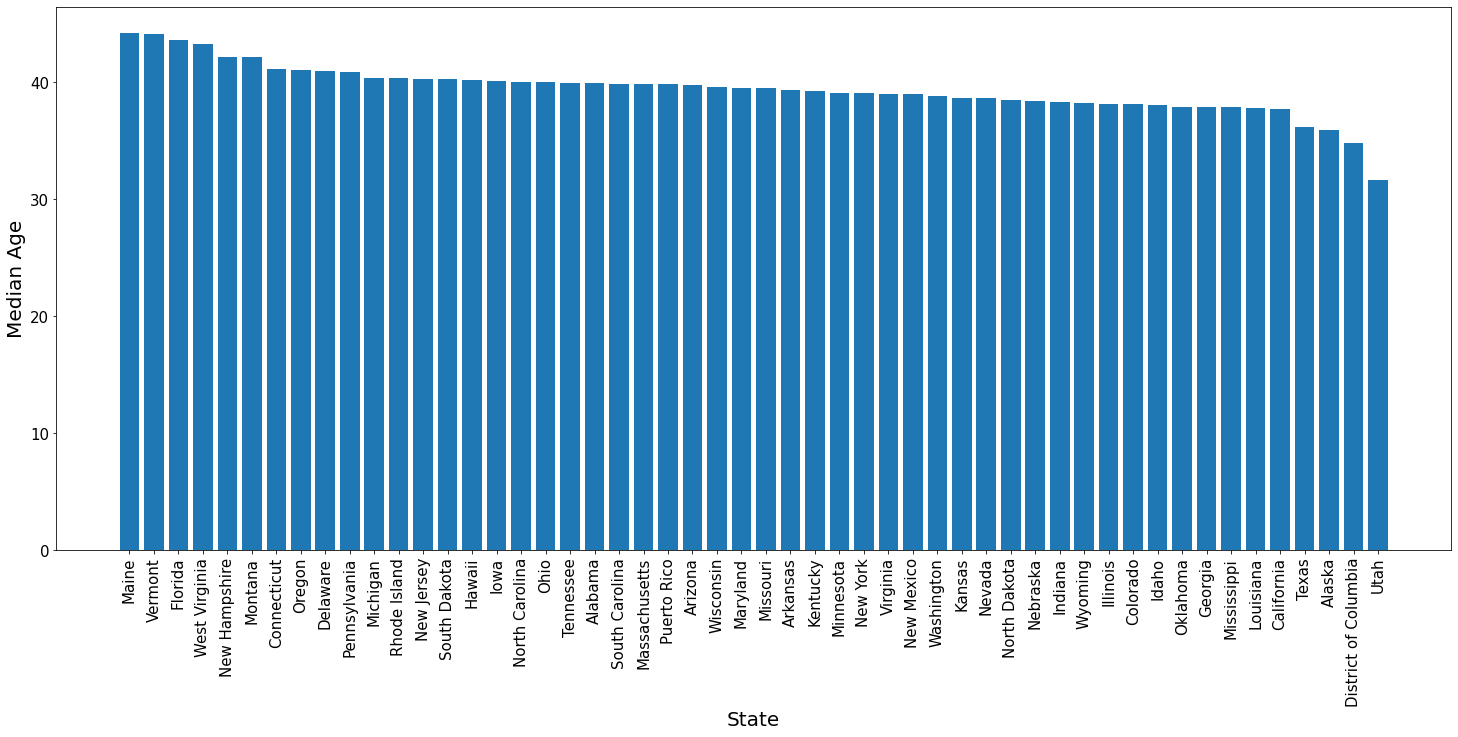

In [52]:
plt.figure(figsize = (25, 10))
plt.bar('state', 'median_age', data=df)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('State', fontsize=20)
plt.ylabel('Median Age', fontsize=20)

###### Binning population variable and analyzing different variables

In [53]:
subset4 = []
subset4 = data_train.loc[:, ['UID', 'pop', 'married', 'separated', 'divorced']]
subset4                         

,UID,pop,married,separated,divorced
0,267822,5230,0.57851,0.01240,0.08770
1,246444,2633,0.34886,0.01426,0.09030
2,245683,6881,0.64745,0.01607,0.10657
3,279653,2700,0.47257,0.02021,0.10106
4,247218,5637,0.12356,0.00000,0.03109
...,...,...,...,...,...
27014,279212,1847,0.24603,0.02249,0.14683
27015,277856,4155,0.61127,0.02473,0.04888
27016,233000,2829,0.70451,0.00520,0.07712
27017,287425,11542,0.75503,0.00915,0.05261


In [54]:
subset4['pop'].min(), subset4['pop'].max()

(3, 53812)

In [55]:
subset4['pop_bins'] = pd.cut(subset4['pop'], bins=np.linspace(0, 55000, 4, dtype='int64'))
subset4['bin_labels'] = pd.cut(subset4['pop'], bins=np.linspace(0, 55000, 4, dtype='int64'), labels=[1, 2, 3])
subset4

,UID,pop,married,separated,divorced,pop_bins,bin_labels
0,267822,5230,0.57851,0.01240,0.08770,"(0, 18333]",1
1,246444,2633,0.34886,0.01426,0.09030,"(0, 18333]",1
2,245683,6881,0.64745,0.01607,0.10657,"(0, 18333]",1
3,279653,2700,0.47257,0.02021,0.10106,"(0, 18333]",1
4,247218,5637,0.12356,0.00000,0.03109,"(0, 18333]",1
...,...,...,...,...,...,...,...
27014,279212,1847,0.24603,0.02249,0.14683,"(0, 18333]",1
27015,277856,4155,0.61127,0.02473,0.04888,"(0, 18333]",1
27016,233000,2829,0.70451,0.00520,0.07712,"(0, 18333]",1
27017,287425,11542,0.75503,0.00915,0.05261,"(0, 18333]",1


In [56]:
print('Count of records per bin :')
print('==========================')
print(subset4.pop_bins.value_counts())

Count of records per bin :
(0, 18333]        26995
(18333, 36666]       21
(36666, 55000]        3
Name: pop_bins, dtype: int64


Text(0.5, 1.0, 'Divorced %')

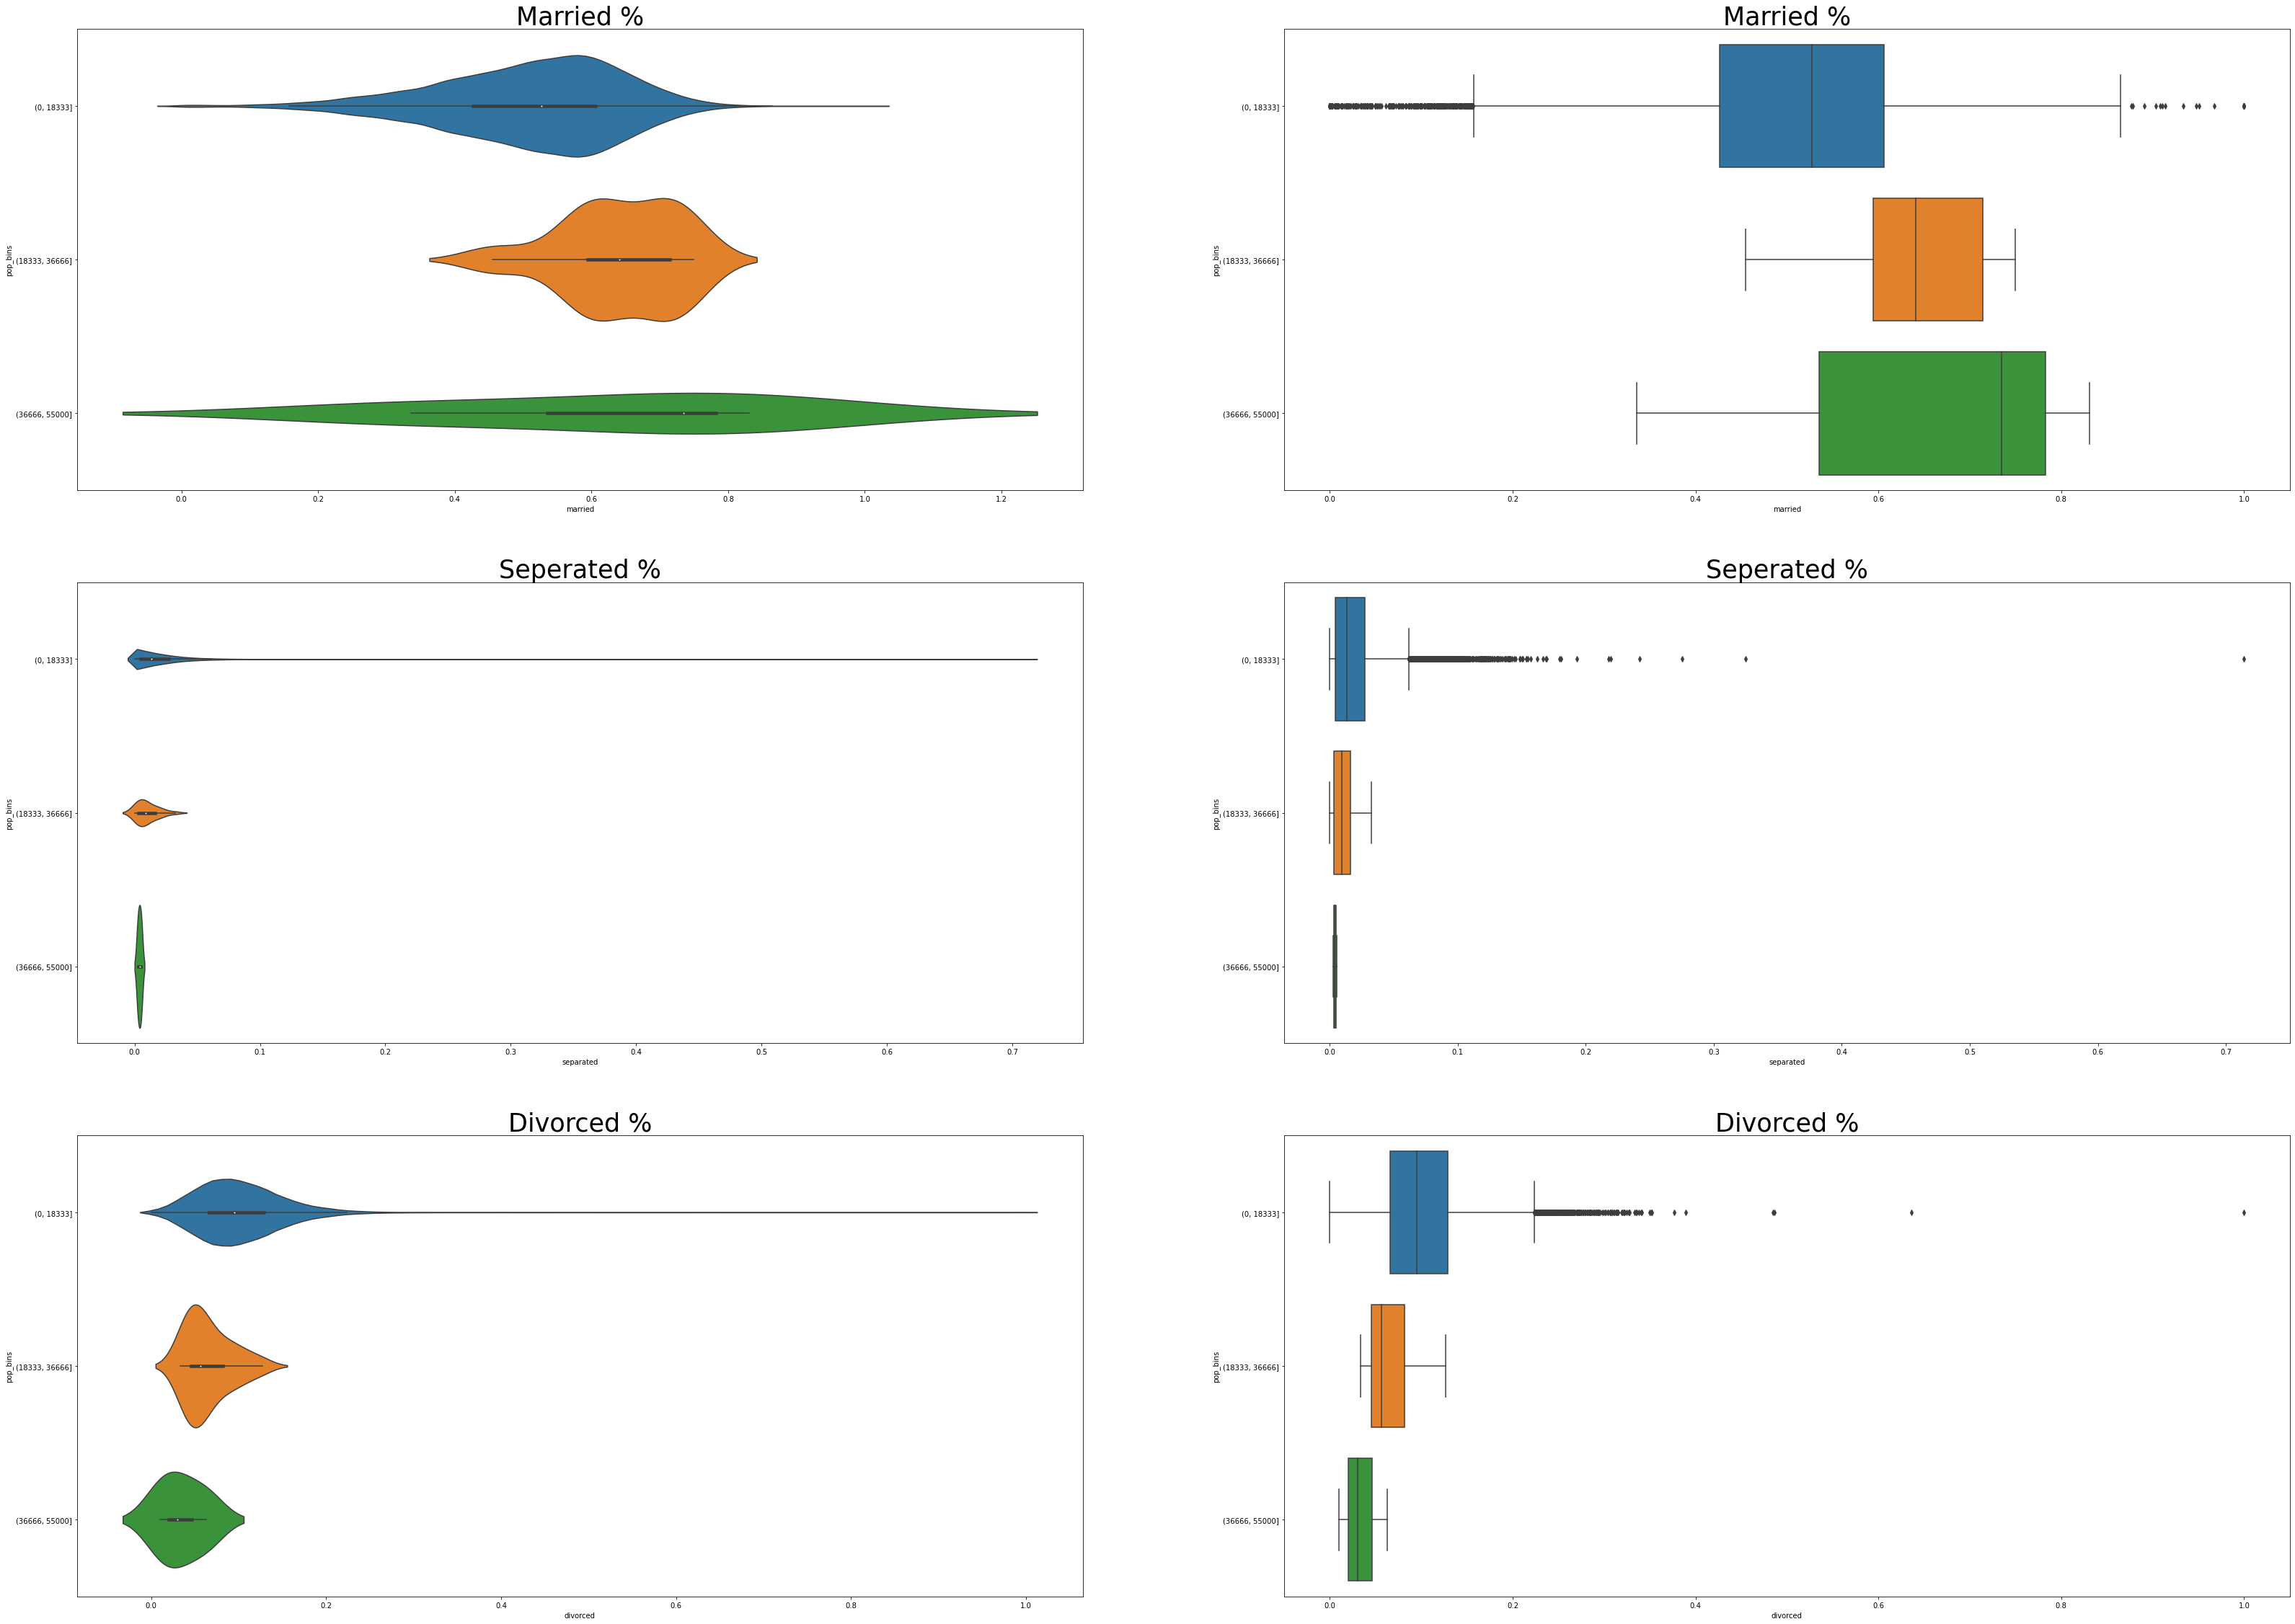

In [57]:
fig, axs = plt.subplots(3, 2, figsize = (55, 40))

sns.violinplot(x="married", y="pop_bins", data=subset4, ax=axs[0,0])
axs[0,0].set_title('Married %', fontsize=35)
#axs[0,0].set_xlabel(xlabel='Pct_married', fontsize = 15)
#axs[0,0].set_ylabel(ylabel='Pop_bins', fontsize = 15)

sns.boxplot(x="married", y="pop_bins", data=subset4, ax=axs[0,1])
axs[0,1].set_title('Married %', fontsize=35)
#axs[0,1].set_xlabel(xlabel='Pct_married', fontsize = 15)
#axs[0,1].set_ylabel(ylabel='Pop_bins', fontsize = 15)

sns.violinplot(x="separated", y="pop_bins", data=subset4, ax=axs[1,0])
axs[1,0].set_title('Seperated %', fontsize=35)
#axs[1,0].set_xlabel(xlabel='Pct_seperated', fontsize = 15)
#axs[1,0].set_ylabel(ylabel='Pop_bins', fontsize = 15)

sns.boxplot(x="separated", y="pop_bins", data=subset4, ax=axs[1,1])
axs[1,1].set_title('Seperated %', fontsize=35)
#axs[1,1].set_xlabel(xlabel='Pct_seperated', fontsize = 15)
#axs[1,1].set_ylabel(ylabel='Pop_bins', fontsize = 15)

sns.violinplot(x="divorced", y="pop_bins", data=subset4, ax=axs[2,0])
axs[2,0].set_title('Divorced %', fontsize=35)
#axs[2,0].set_xlabel(xlabel='Pct_divored', fontsize = 15)
#axs[2,0].set_ylabel(ylabel='Pop_bins', fontsize = 15)

sns.boxplot(x="divorced", y="pop_bins", data=subset4, ax=axs[2,1])
axs[2,1].set_title('Divorced %', fontsize=35)
#axs[2,1].set_xlabel(xlabel='Pct_divorced', fontsize = 15)
#axs[2,1].set_ylabel(ylabel='Pop_bins', fontsize = 15)

In [58]:
subset5 = []
subset5 = data_train.loc[:, ['UID', 'STATEID', 'state', 'rent_median', 'hi_median']]
subset5

,UID,STATEID,state,rent_median,hi_median
0,267822,36,New York,784.0,48120.0
1,246444,18,Indiana,848.0,35186.0
2,245683,18,Indiana,703.0,74964.0
3,279653,72,Puerto Rico,782.0,37845.0
4,247218,20,Kansas,881.0,22497.0
...,...,...,...,...,...
27014,279212,72,Puerto Rico,419.0,13317.0
27015,277856,42,Pennsylvania,1788.0,108284.0
27016,233000,8,Colorado,834.0,73350.0
27017,287425,48,Texas,1843.0,148548.0


In [59]:
subset5['pct_rent'] = (subset5['rent_median'] / subset5['hi_median']) * 100
subset5

,UID,STATEID,state,rent_median,hi_median,pct_rent
0,267822,36,New York,784.0,48120.0,1.629260
1,246444,18,Indiana,848.0,35186.0,2.410049
2,245683,18,Indiana,703.0,74964.0,0.937783
3,279653,72,Puerto Rico,782.0,37845.0,2.066323
4,247218,20,Kansas,881.0,22497.0,3.916078
...,...,...,...,...,...,...
27014,279212,72,Puerto Rico,419.0,13317.0,3.146354
27015,277856,42,Pennsylvania,1788.0,108284.0,1.651213
27016,233000,8,Colorado,834.0,73350.0,1.137014
27017,287425,48,Texas,1843.0,148548.0,1.240676


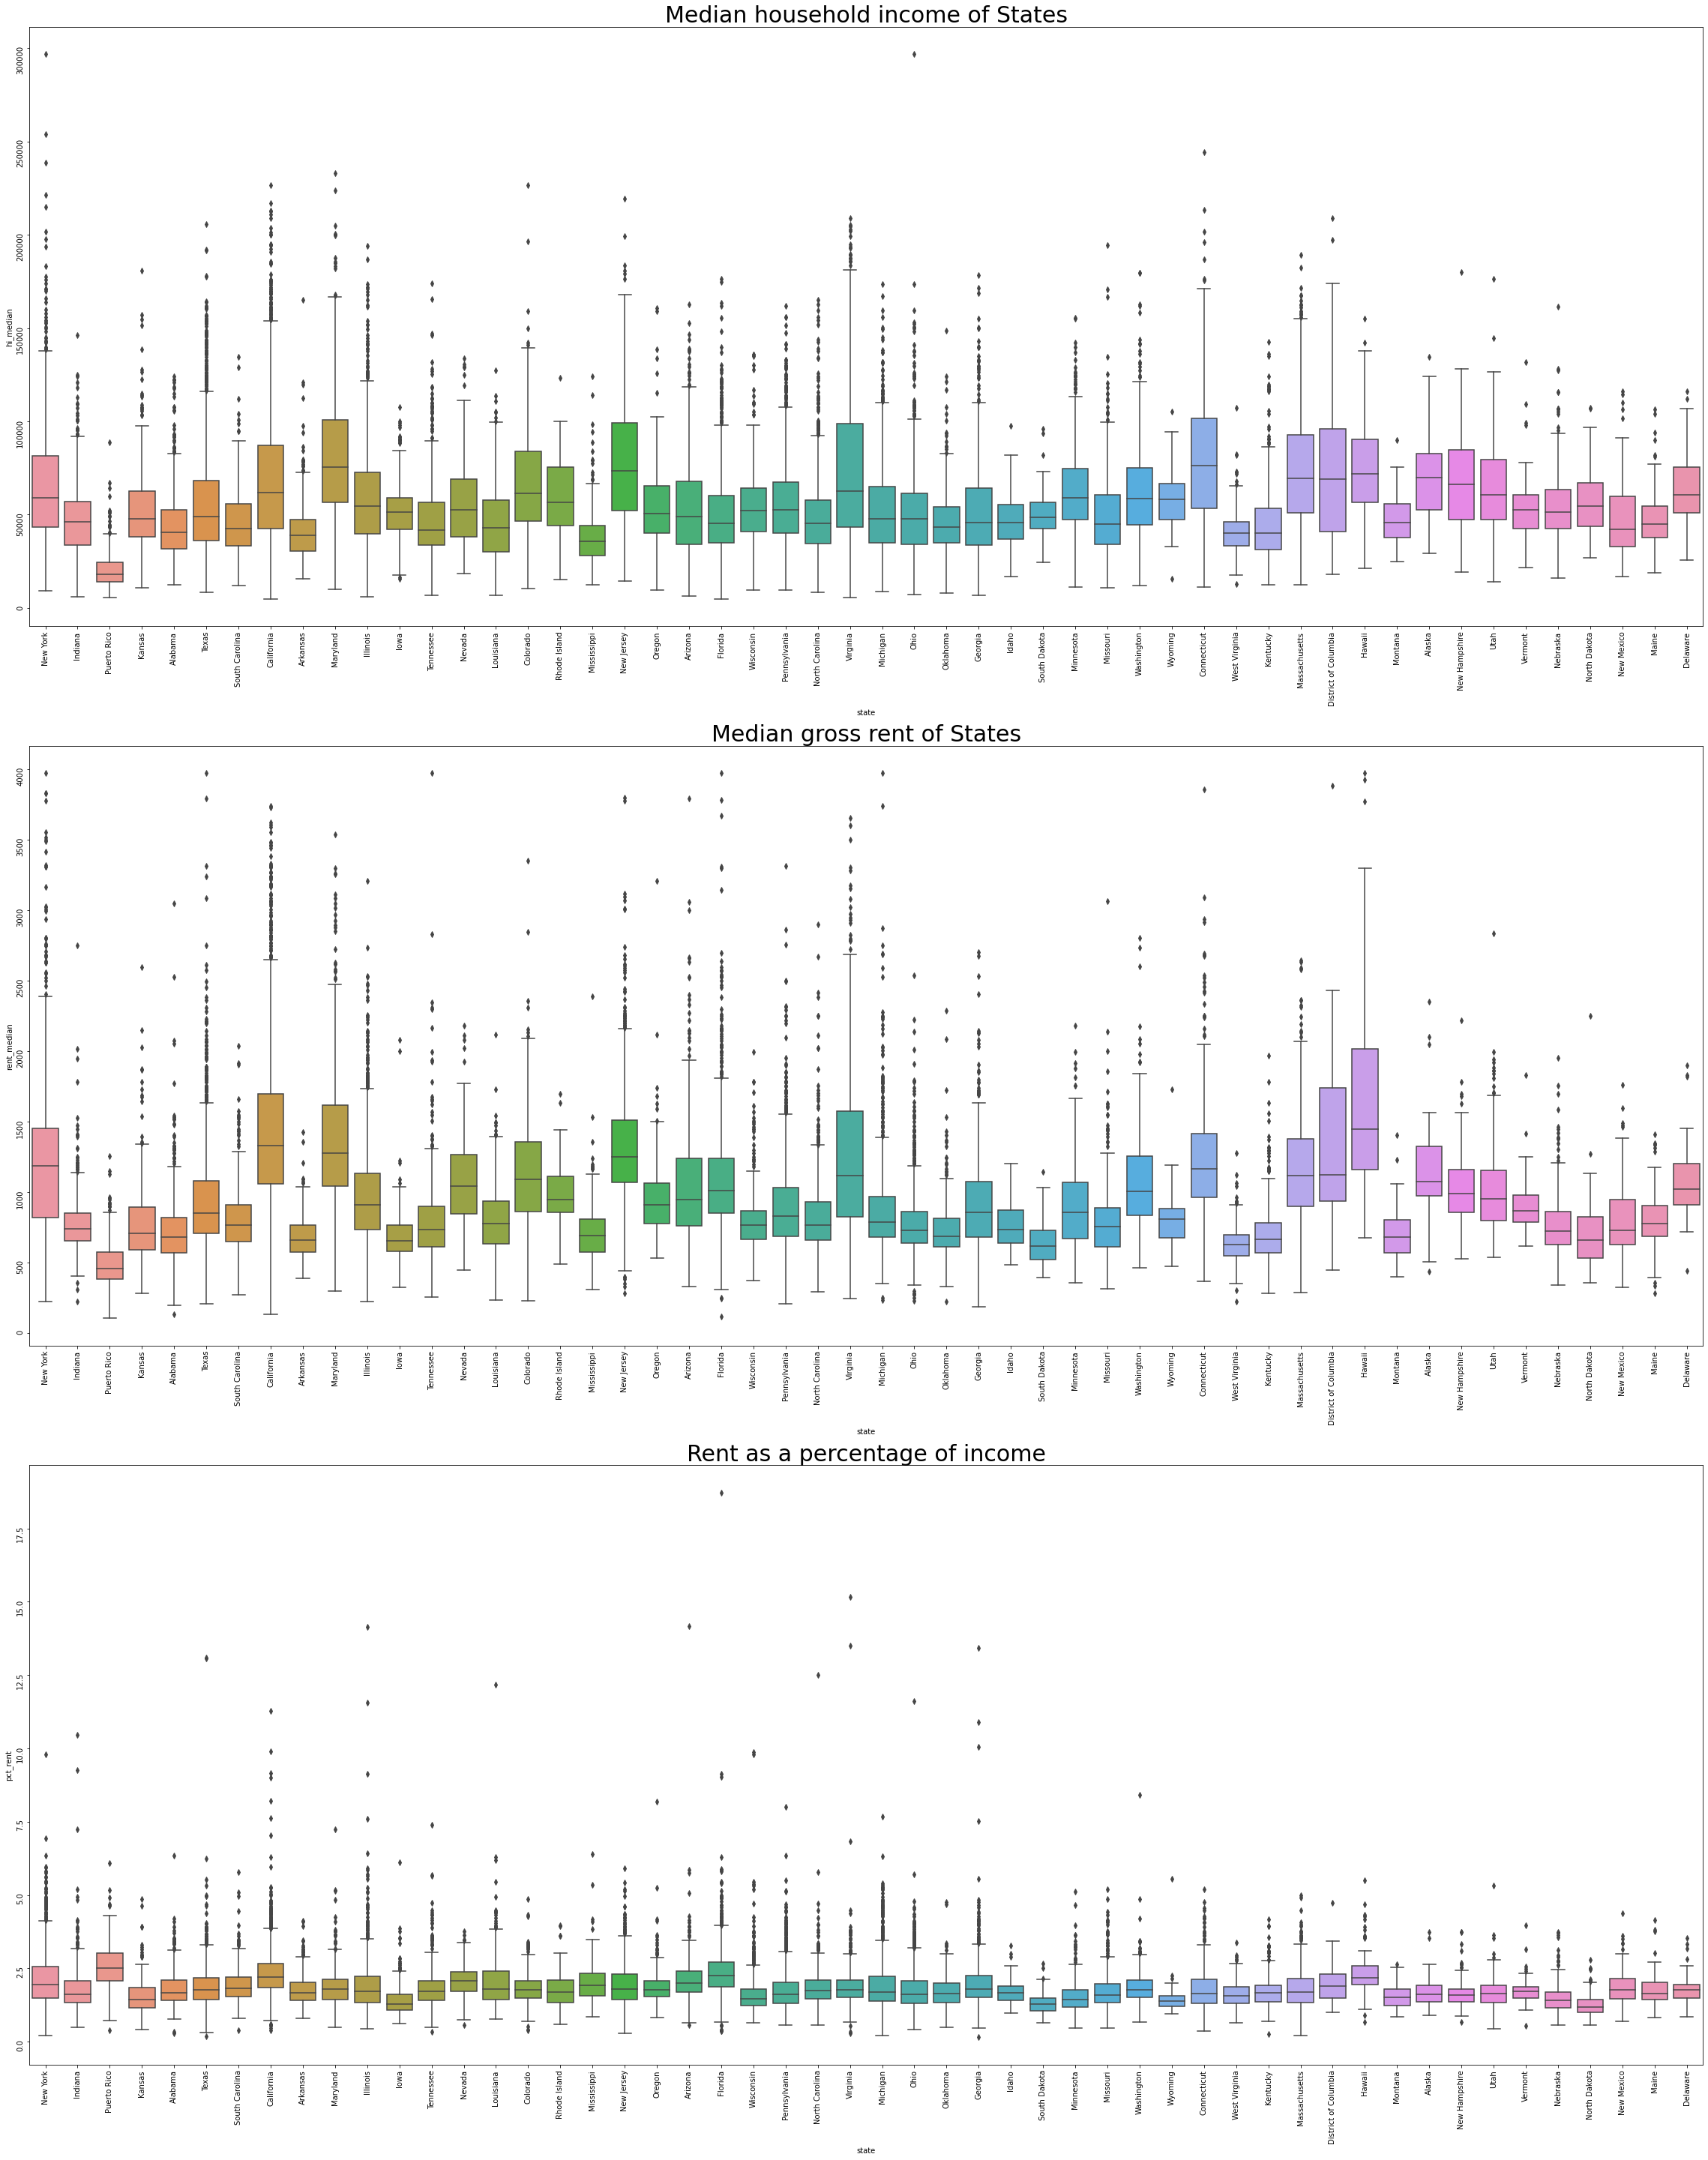

In [60]:
f, a = plt.subplots(3,1, figsize = (40,50))

sns.boxplot(x=subset5['state'], y=subset5['hi_median'], data=subset5, ax=a[0])
a[0].set_title('Median household income of States', fontsize=30)
a[0].tick_params(labelrotation=90)

sns.boxplot(x=subset5['state'], y=subset5['rent_median'], data=subset5, ax=a[1])
a[1].set_title('Median gross rent of States', fontsize=30)
a[1].tick_params(labelrotation=90)

sns.boxplot(x=subset5['state'], y=subset5['pct_rent'], data=subset5, ax=a[2])
a[2].set_title('Rent as a percentage of income', fontsize=30)
a[2].tick_params(labelrotation=90)

In [61]:
subset6 = []
subset6 = data_train.iloc[:, 16:79]
cor = subset6.corr()
cor

,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
male_pop,1.000000,0.925422,0.160451,0.155060,0.109243,0.225278,0.383920,0.050416,0.044653,0.006490,...,-0.199605,-0.161807,-0.063287,0.871145,0.925803,0.093399,0.140353,-0.004136,-0.076685,-0.150630
female_pop,0.925422,1.000000,0.161067,0.154394,0.124465,0.262106,0.415915,0.073804,0.071938,0.033515,...,-0.185348,-0.159702,0.010018,0.941075,0.998722,0.091639,0.196446,-0.071785,-0.088526,-0.172370
rent_mean,0.160451,0.161067,1.000000,0.976530,0.655709,-0.390529,-0.016461,0.101111,0.113452,0.054498,...,0.004015,0.045356,-0.169019,0.129587,0.161052,0.140139,0.257507,-0.109077,-0.188299,-0.377283
rent_median,0.155060,0.154394,0.976530,1.000000,0.569737,-0.385166,-0.021081,0.099261,0.114291,0.057387,...,-0.013766,0.029164,-0.171656,0.121661,0.154373,0.131651,0.244229,-0.097235,-0.174376,-0.361044
rent_stdev,0.109243,0.124465,0.655709,0.569737,1.000000,-0.179891,0.066595,-0.014563,0.040018,0.040285,...,0.102118,0.099312,-0.021651,0.109060,0.123993,0.049000,0.131938,-0.071744,-0.137144,-0.270318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pct_own,0.093399,0.091639,0.140139,0.131651,0.049000,-0.613848,-0.686905,-0.097706,-0.180092,-0.237645,...,0.414509,0.511933,0.315439,0.017121,0.091510,1.000000,0.685156,-0.389395,-0.287351,-0.102927
married,0.140353,0.196446,0.257507,0.244229,0.131938,-0.439262,-0.391630,-0.095517,-0.180335,-0.252397,...,0.332016,0.432633,0.298154,0.069925,0.193699,0.685156,1.000000,-0.254295,-0.222321,-0.277231
married_snp,-0.004136,-0.071785,-0.109077,-0.097235,-0.071744,0.215021,0.211749,0.039182,0.096388,0.152238,...,-0.139093,-0.179465,-0.058776,-0.073280,-0.068172,-0.389395,-0.254295,1.000000,0.675413,0.060232
separated,-0.076685,-0.088526,-0.188299,-0.174376,-0.137144,0.204136,0.141105,0.042341,0.089736,0.129853,...,-0.077469,-0.109825,0.007658,-0.090401,-0.088101,-0.287351,-0.222321,0.675413,1.000000,0.133966


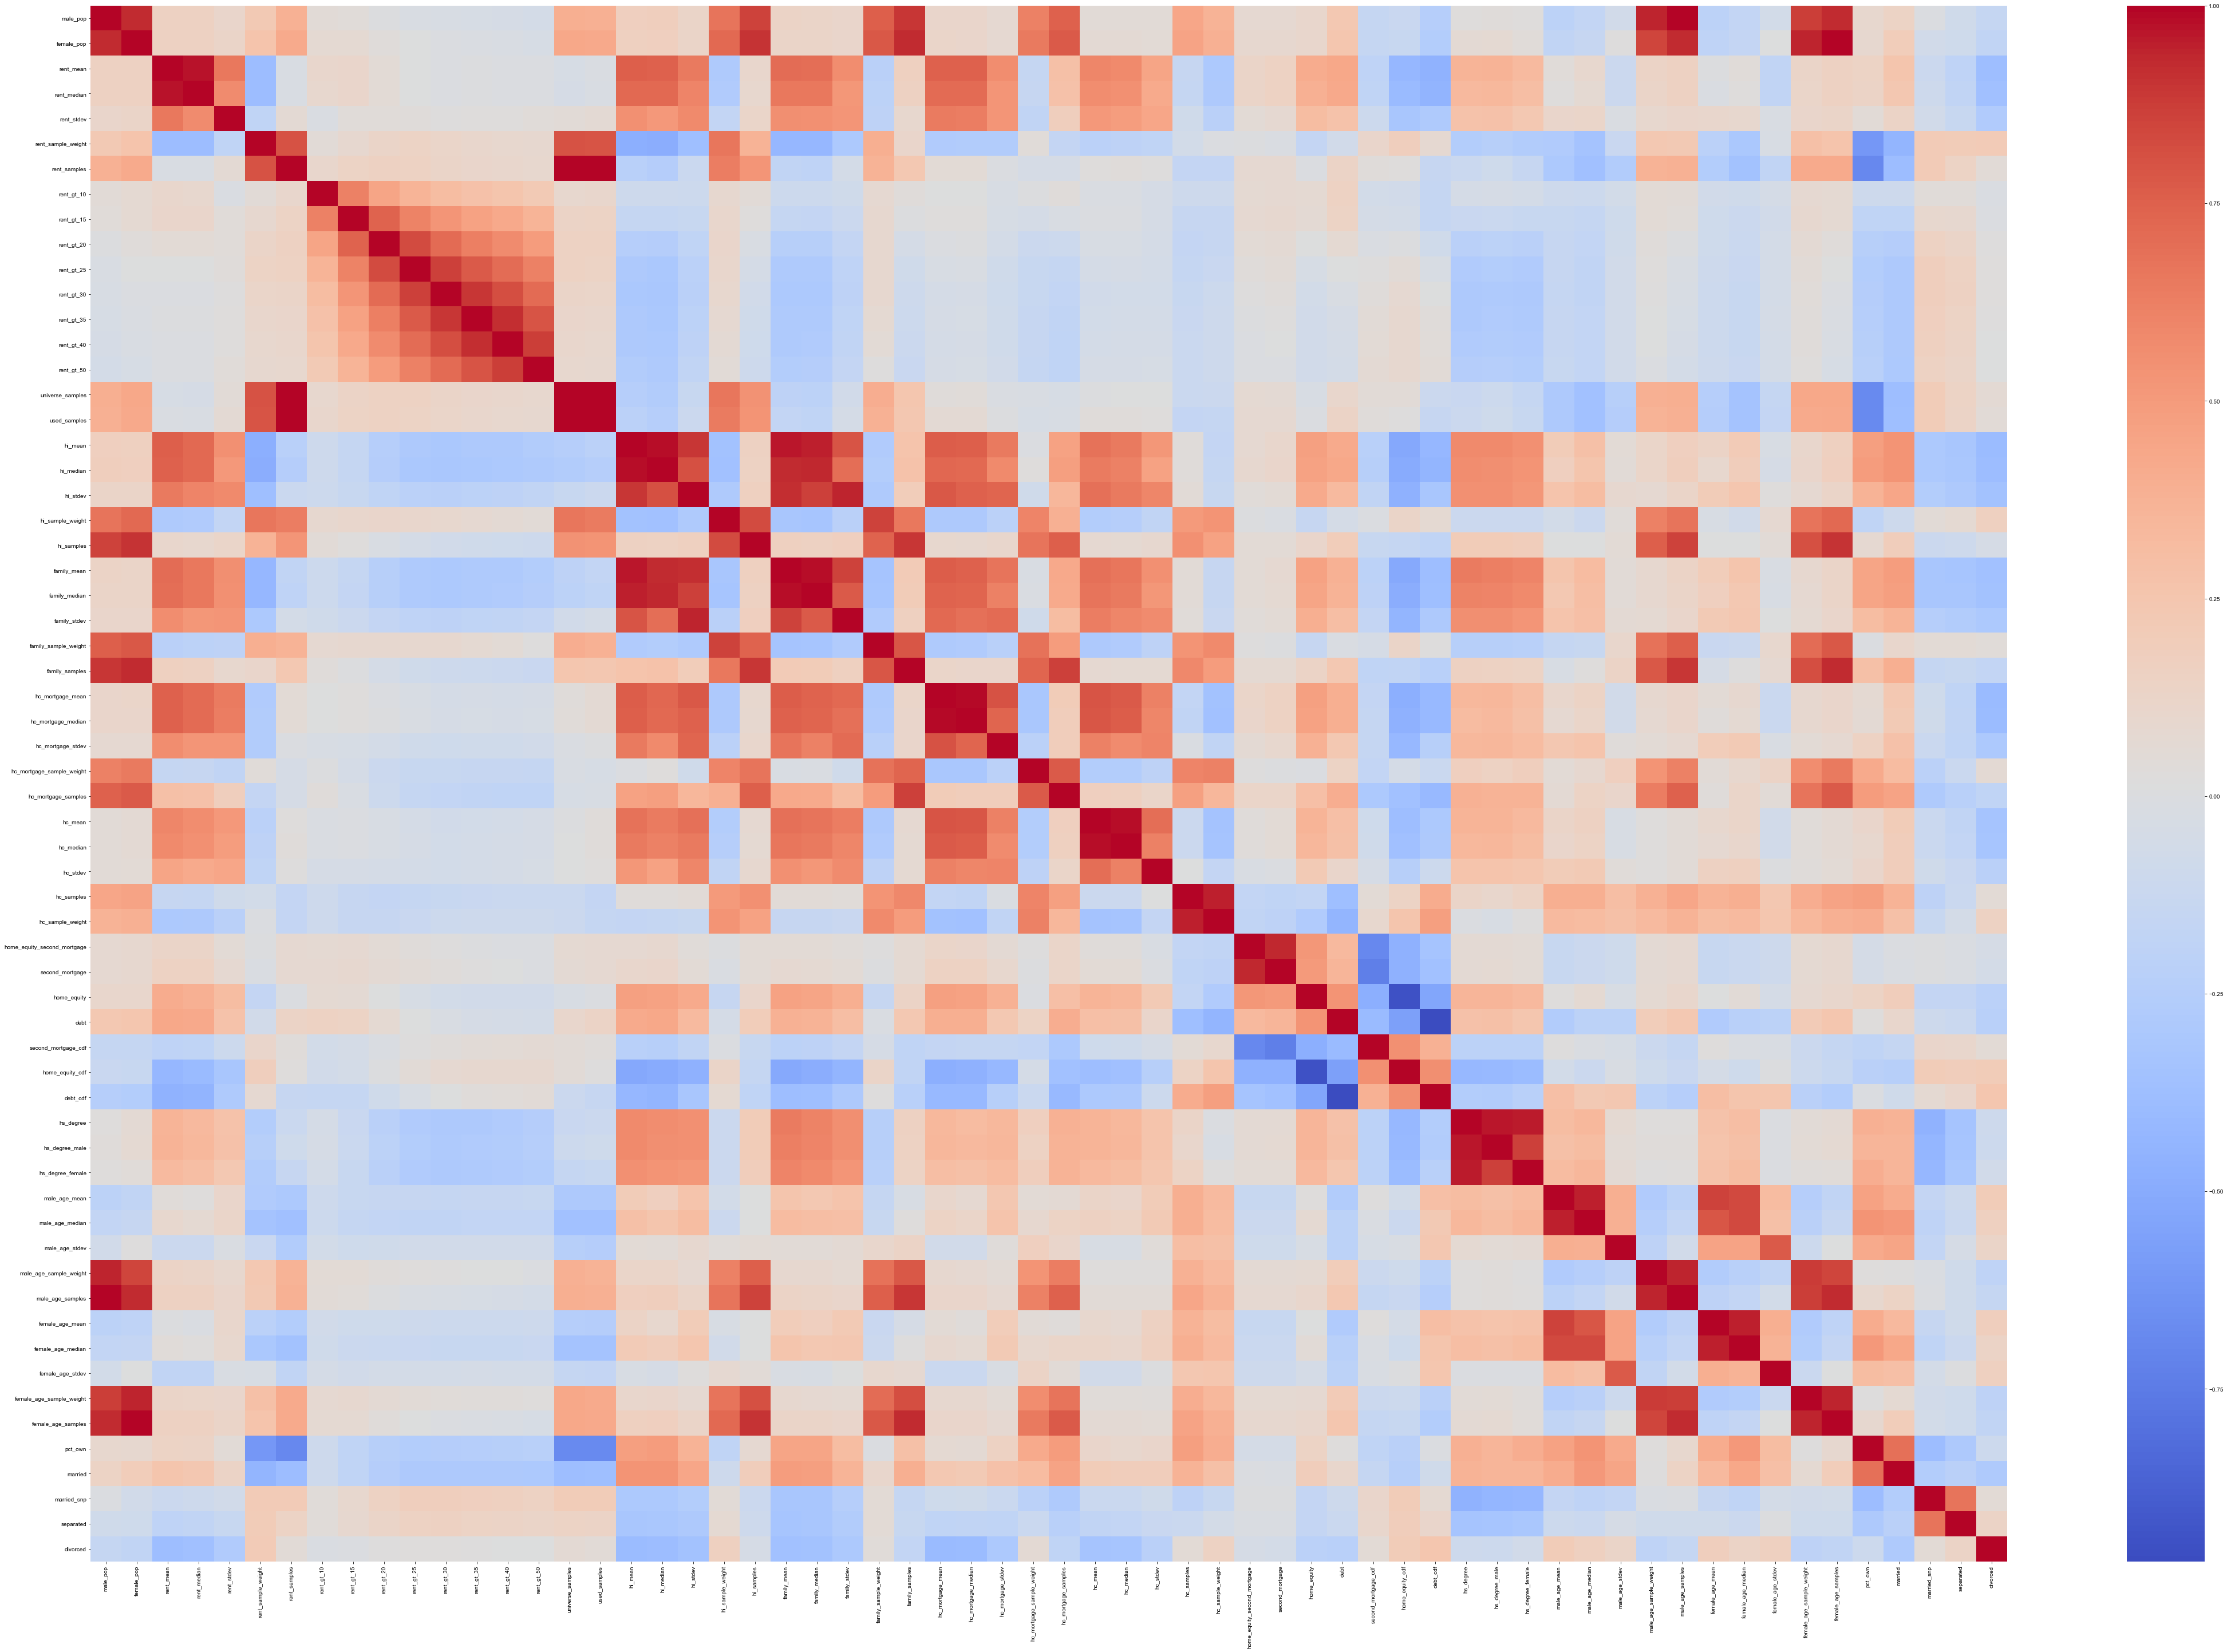

In [62]:
plt.figure(figsize = (75,50))
sns.heatmap(data=cor, cmap='coolwarm')
sns.set(font_scale=4)

### Factor Analysis

###### Adequecy test to evaluate the “factorability” of dataset using Bartlett’s Test and  Kaiser-Meyer-Olkin Test

In [63]:
chi_square_value, p_value = calculate_bartlett_sphericity(subset6)
chi_square_value, p_value

(3515703.105581654, 0.0)

###### p_value is 0 which confirms the factorability of dataset 

In [64]:
kmo_all, kmo_model = calculate_kmo(subset6)
kmo_model

0.8740281944811359

###### 87% is a very good score for factorability

###### Factorarizing dataset

In [65]:
fa = FactorAnalyzer()
fa.fit(subset6, 10)

FactorAnalyzer(rotation_kwargs={})

In [66]:
ev, v = fa.get_eigenvalues()

Text(0, 0.5, 'Eigen value')

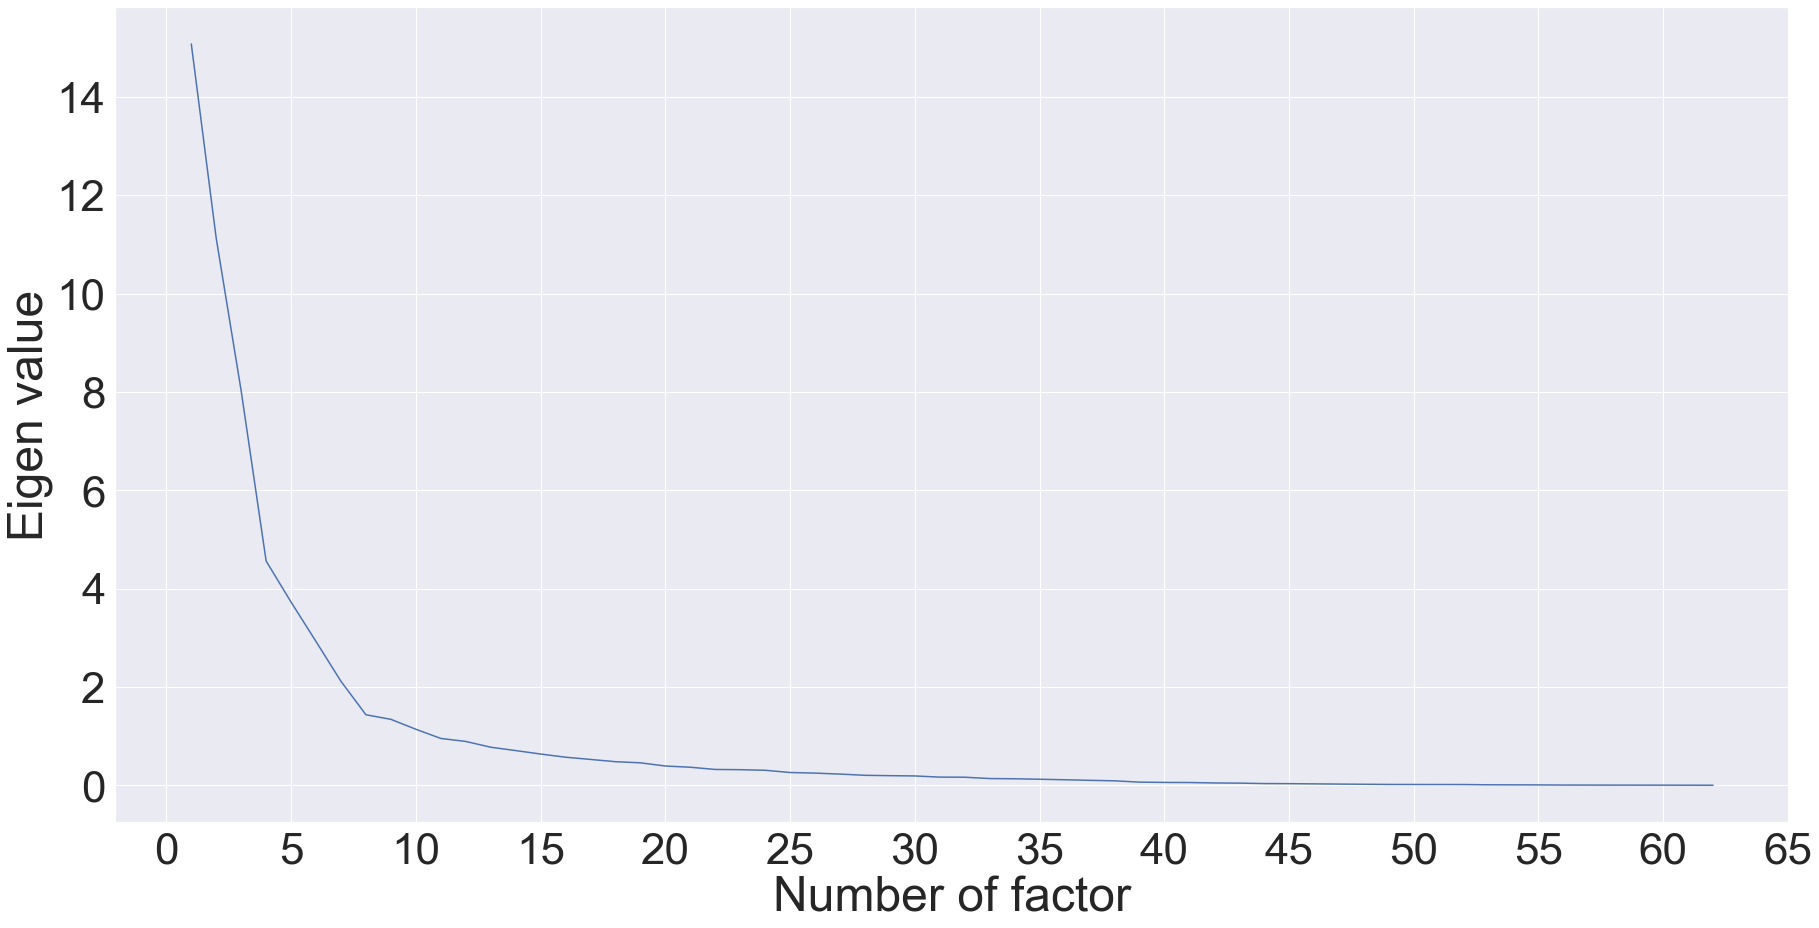

In [67]:
plt.figure(figsize = (30,15))
plt.plot(range(1, subset6.shape[1]+1), ev)
plt.xticks(np.arange(0, 70, step=5))
plt.xlabel('Number of factor')
plt.ylabel('Eigen value')

###### Elbow is at 8

In [68]:
n = 8
fa = FactorAnalyzer(n)
fa.fit(subset6, 10)
loads = fa.loadings_

print(loads)

[[ 1.40292812e-01  9.58541809e-01 -1.67617766e-02  8.89901602e-02
  -1.34932821e-01 -1.03711577e-01  1.19162115e-02 -3.13486889e-03]
 [ 1.23416052e-01  9.65887000e-01  2.07934002e-02  1.40203386e-01
  -5.61555931e-02 -7.31217375e-02 -3.14667823e-03 -5.23004919e-02]
 [ 7.61579282e-01  6.22396269e-02  1.28700282e-01 -9.24757317e-02
  -5.78844815e-02 -3.02386904e-02 -3.75342516e-02 -1.82815722e-01]
 [ 7.14468415e-01  6.28511410e-02  1.19188540e-01 -1.07145287e-01
  -6.88589031e-02 -4.50993749e-02 -3.64000605e-02 -1.89996112e-01]
 [ 7.11371690e-01  2.82911586e-02  1.06303765e-01  8.57021109e-02
   5.95451581e-02 -3.10268163e-02 -6.66374277e-03 -4.84739957e-03]
 [-2.11815054e-01  1.71289099e-01 -8.01849244e-02  8.28229219e-01
   1.66958969e-02  3.50895863e-02 -9.16655002e-03 -2.58825073e-03]
 [ 1.33700686e-01  2.46029806e-01 -5.78921449e-02  9.94143626e-01
  -3.47488202e-02  4.70987727e-02 -1.77784316e-02 -6.48789227e-02]
 [-9.19800110e-02  3.73349919e-02  4.15160384e-01  2.44341716e-02
   

In [69]:
df1 = pd.DataFrame(loads)
df1.set_index(subset6.columns, drop=True, inplace=True)
for i in range(n):
    s = 'Factor ' + str(i+1)
    df1.rename(columns = {i : s}, inplace=True)
    
df1

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7,Factor 8
male_pop,0.140293,0.958542,-0.016762,0.088990,-0.134933,-0.103712,0.011916,-0.003135
female_pop,0.123416,0.965887,0.020793,0.140203,-0.056156,-0.073122,-0.003147,-0.052300
rent_mean,0.761579,0.062240,0.128700,-0.092476,-0.057884,-0.030239,-0.037534,-0.182816
rent_median,0.714468,0.062851,0.119189,-0.107145,-0.068859,-0.045099,-0.036400,-0.189996
rent_stdev,0.711372,0.028291,0.106304,0.085702,0.059545,-0.031027,-0.006664,-0.004847
...,...,...,...,...,...,...,...,...
pct_own,-0.023085,0.204127,-0.011035,-0.671322,0.292782,0.122074,-0.001777,-0.017205
married,0.186195,0.233924,-0.152657,-0.368018,0.375809,-0.052024,-0.026702,-0.109628
married_snp,0.098688,-0.030919,-0.023825,0.135127,0.053740,-0.567581,0.006488,-0.027145
separated,-0.049444,-0.057525,-0.004991,0.121386,0.111476,-0.407311,0.001566,-0.047621


# Linear Regression

In [70]:
ytrain = data_train['hc_mortgage_mean']
xtrain = data_train.iloc[:, 16:80]
xtrain.drop('hc_mortgage_mean', axis=1, inplace=True)

In [71]:
ytest = data_test['hc_mortgage_mean']
xtest = data_test.iloc[:, 16:80]
xtest.drop('hc_mortgage_mean', axis=1, inplace=True)

In [72]:
xtrain.head()

,male_pop,female_pop,rent_mean,rent_median,rent_stdev,rent_sample_weight,rent_samples,rent_gt_10,rent_gt_15,rent_gt_20,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,2612,2618,769.38638,784.0,232.63967,272.34441,362.0,0.86761,0.79155,0.59155,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,1349,1284,804.87924,848.0,253.46747,312.58622,513.0,0.97410,0.93227,0.69920,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,3643,3238,742.77365,703.0,323.39011,291.85520,378.0,0.95238,0.88624,0.79630,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,1141,1559,803.42018,782.0,297.39258,259.30316,368.0,0.94693,0.87151,0.69832,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,2586,3051,938.56493,881.0,392.44096,1005.42886,1704.0,0.99286,0.98247,0.91688,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [73]:
lr = LinearRegression()
model_lr = lr.fit(xtrain, ytrain)

In [74]:
print('Model Accuracy for train set = ', model_lr.score(xtrain, ytrain))
print('Model Accuracy for test set = ', model_lr.score(xtest, ytest))

Model Accuracy for train set =  0.988059188046286
Model Accuracy for test set =  0.9873424570198082


#### Predicting Total monthly expenditure for home mortgages loan for national level

In [75]:
ypredict = model_lr.predict(xtest)

In [76]:
r_square = r2_score(ytest, ypredict)
print('R^2 Score = ', r_square)

R^2 Score =  0.9873424570198082


In [77]:
RMSE =  math.sqrt(mean_squared_error(ytest, ypredict))
print('Root mean square error = ', RMSE)

Root mean square error =  70.88500291621753


#### Distribution of Predicted Variable

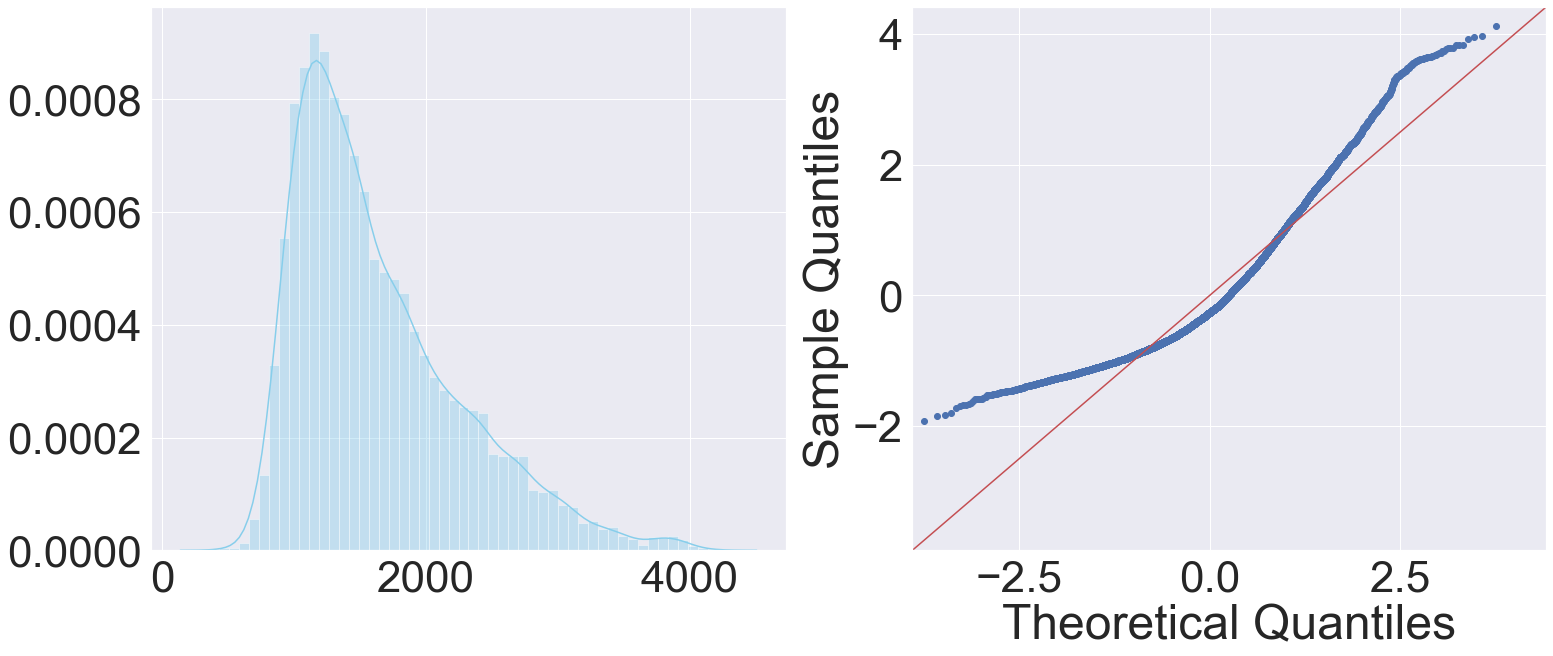

In [78]:
f, axes = plt.subplots(1, 2, figsize=(25, 10))
sns.distplot(ypredict, color="skyblue", ax=axes[0])
qqplot(ypredict, line="45", fit=True, ax=axes[1])

plt.show()

#### Predicting Total monthly expenditure for home mortgages loan for state level

In [79]:
states = data_test.state.unique()
state_predict = pd.DataFrame(columns=['State', 'R_Square', 'RMSE'])

In [80]:
for state in states:
    state_data = data_test.loc[data_test['state']==state]
    ytest = state_data['hc_mortgage_mean']
    xtest = state_data.iloc[:, 16:80]
    xtest.drop('hc_mortgage_mean', axis=1, inplace=True)
    ypredict = model_lr.predict(xtest)
    r_square = r2_score(ytest, ypredict)
    RMSE =  math.sqrt(mean_squared_error(ytest, ypredict))
    state_predict = state_predict.append({'State': state, 'R_Square': r_square, 'RMSE': RMSE}, ignore_index=True)

In [81]:
state_predict

,State,R_Square,RMSE
0,Michigan,0.985615,47.547114
1,Maine,0.992244,32.252016
2,Pennsylvania,0.992220,44.831024
3,Kentucky,0.976563,45.261362
4,Texas,0.985263,68.945345
5,Florida,0.979988,78.393721
6,Georgia,0.969566,75.217103
7,New York,0.965117,144.425311
8,California,0.979194,91.324101
9,Washington,0.987840,53.162486


### END